# <b><span style='color:#F1A424'>AutoML - Regression - Medical Insurance Charges Prediction </span> </b>

### Disclaimer
The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.

## <b> Problem overview:</b>
    

**Dataset Used : Medical insurance Dataset**

**Features**:

- `Age`: The insured person's age.
- `Sex`: Gender (male or female) of the insured.
- `BMI (Body Mass Index)`: A measure of body fat based on height and weight.
- `Children`: The number of dependents covered.
- `Smoker`: Whether the insured is a smoker (yes or no).
- `Region`: The geographic area of coverage.

**Target Variable**:

- `Charges`: The medical insurance costs incurred by the insured person.
    
**Objective**:

The primary objective is typically to build a model that can accurately predict medical insurance costs incurred by the insured person.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Binning on 'age' feature to get 3 different levels.
- Customized target encoding on 'region' feature.
- Train test split with training size 0.9.
- Feature scaling with 'midrange' method.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoRegressor

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','insurance')

In [5]:
# Fetching in teradata dataframe
insurance_df = DataFrame("insurance")

In [6]:
# first 5 rows
insurance_df.head()

age,sex,bmi,children,smoker,region,charges
18,female,38.28,0,no,southeast,14133.03775
18,male,23.32,1,no,southeast,1711.0268
18,female,26.315,0,no,northeast,2198.18985
18,male,34.43,0,no,southeast,1137.4697
18,male,25.46,0,no,northeast,1708.0014
18,male,33.535,0,yes,northeast,34617.84065
18,female,25.08,0,no,northeast,2196.4732
18,male,35.2,1,no,southeast,1727.54
18,female,35.625,0,no,northeast,2211.13075
18,female,38.17,0,no,southeast,1631.6683


In [7]:
# insurance_df dataset
insurance_df.shape

(1338, 7)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
insurance_df_sample = insurance_df.sample(frac = [0.8, 0.2])

In [9]:
insurance_df_sample.head()

age,sex,bmi,children,smoker,region,charges,sampleid
18,male,17.29,2,yes,northeast,12829.4551,2
18,male,41.14,0,no,southeast,1146.7966,1
18,female,42.24,0,yes,southeast,38792.6856,1
18,female,29.165,0,no,northeast,7323.734819,1
18,female,36.85,0,yes,southeast,36149.4835,1
18,male,34.1,0,no,southeast,1137.011,1
18,female,33.88,0,no,southeast,11482.63485,1
18,female,26.315,0,no,northeast,2198.18985,2
18,female,31.35,0,no,southeast,1622.1885,1
18,female,31.13,0,no,southeast,1621.8827,1


In [10]:
# Fetching train and test data
insurance_df_train= insurance_df_sample[insurance_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
insurance_df_test = insurance_df_sample[insurance_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
insurance_df_train.shape

(1070, 7)

In [12]:
# test data shape
insurance_df_test.shape

(268, 7)

In [13]:
#train dataset
insurance_df_train.head()

age,sex,bmi,children,smoker,region,charges
18,male,26.18,2,no,southeast,2304.0022
18,male,34.43,0,no,southeast,1137.4697
18,male,21.47,0,no,northeast,1702.4553
18,female,30.115,0,no,northeast,21344.8467
18,male,23.085,0,no,northeast,1704.70015
18,male,25.175,0,yes,northeast,15518.18025
18,male,37.29,0,no,southeast,1141.4451
18,female,33.155,0,no,northeast,2207.69745
18,male,34.1,0,no,southeast,1137.011
18,female,40.185,0,no,northeast,2217.46915


In [14]:
# test dataset
insurance_df_test.head()

age,sex,bmi,children,smoker,region,charges
18,female,38.28,0,no,southeast,1631.8212
18,female,39.16,0,no,southeast,1633.0444
18,male,30.14,0,no,southeast,1131.5066
18,female,28.215,0,no,northeast,2200.83085
18,female,31.92,0,no,northeast,2205.9808
18,male,28.31,1,no,northeast,11272.33139
18,female,21.66,0,yes,northeast,14283.4594
18,female,26.315,0,no,northeast,2198.18985
18,male,23.32,1,no,southeast,1711.0268
18,male,22.99,0,no,northeast,1704.5681


In [15]:
AutoRegressor.generate_custom_config("custom_insurance")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  1



Customizing Feature Engineering Phase ...

Available options for customization of feature engineering phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Missing Value Handling

Index 2: Customize Bincode Encoding

Index 3: Customize String Manipulation

Index 4: Customize Categorical Encoding

Index 5: Customize Mathematical Transformation

Index 6: Customize Nonlinear Transformation

Index 7: Customize Antiselect Features

Index 8: Back to main menu

Index 9: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in feature engineering phase:  2,4,8



Customizing Bincode Encoding ...

Provide the following details to customize binning and coding encoding:

Available binning methods with corresponding indices:
Index 1: Equal-Width
Index 2: Variable-Width



Enter the feature or list of features for binning:  age

Enter the index of corresponding binning method for feature age:  1

Enter the number of bins for feature age:  3



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of bincode encoding has been completed successfully.

Customizing Categorical Encoding ...

Provide the following details to customize categorical encoding:

Available categorical encoding methods with corresponding indices:
Index 1: OneHotEncoding
Index 2: OrdinalEncoding
Index 3: TargetEncoding



Enter the list of corresponding index categorical encoding methods you want to use:  3

Enter the feature or list of features for TargetEncoding:  region



Available target encoding methods with corresponding indices:
Index 1: CBM_BETA
Index 2: CBM_DIRICHLET
Index 3: CBM_GAUSSIAN_INVERSE_GAMMA



Enter the index of target encoding method for feature region:  3

Enter the response column for target encoding method for feature region:  charges



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of categorical encoding has been completed successfully.

Customization of feature engineering phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Data Imbalance Handling

Index 2: Customize Outlier Handling

Index 3: Customize Feature Scaling

Index 4: Back to main menu

Index 5: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  3



Available feature scaling methods with corresponding indices:
Index 1: maxabs
Index 2: mean
Index 3: midrange
Index 4: range
Index 5: rescale
Index 6: std
Index 7: sum
Index 8: ustd



Enter the corresponding index feature scaling method:  6



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of feature scaling has been completed successfully.

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Data Imbalance Handling

Index 2: Customize Outlier Handling

Index 3: Customize Feature Scaling

Index 4: Back to main menu

Index 5: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  4



Customization of data preparation phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  3



Customizing Model Training Phase ...

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  1



Customizing Model Hyperparameter ...

Available models for hyperparameter tuning with corresponding indices:
Index 1: decision_forest
Index 2: xgboost
Index 3: knn
Index 4: glm
Index 5: svm

Available hyperparamters update methods with corresponding indices:
Index 1: ADD
Index 2: REPLACE



Enter the list of model indices for performing hyperparameter tuning:  2



Available hyperparameters for model 'xgboost' with corresponding indices:
Index 1: min_impurity
Index 2: max_depth
Index 3: min_node_size
Index 4: shrinkage_factor
Index 5: iter_num



Enter the list of hyperparameter indices for model 'xgboost':  2

Enter the index of corresponding update method for hyperparameters 'max_depth' for model 'xgboost':  2

Enter the list of value for hyperparameter 'max_depth' for model 'xgboost':  4,5,6



Customization of model hyperparameter has been completed successfully.

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  3



Customization of model training phase has been completed successfully.

Process of generating custom config file for AutoML has been completed successfully.

'custom_insurance.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [16]:
# Creating AutoRegressor instance
# Using xgboost model for model training.
# Keeping early stopping timer threshold to 100 sec and max_models to 6
# and verbose level 2 for detailed loggging
# Using custom json file for custom run

aml = AutoRegressor(include=['xgboost'],
                    max_runtime_secs=100,
                    max_models=6,
                    verbose=2,
                    custom_config_file="custom_insurance.json")


Received below input for customization : 
{
    "BincodeIndicator": true,
    "BincodeParam": {
        "age": {
            "Type": "Equal-Width",
            "NumOfBins": 3
        }
    },
    "CategoricalEncodingIndicator": true,
    "CategoricalEncodingParam": {
        "TargetEncodingIndicator": true,
        "TargetEncodingList": {
            "region": {
                "encoder_method": "CBM_GAUSSIAN_INVERSE_GAMMA",
                "response_column": "charges"
            }
        }
    },
    "FeatureScalingIndicator": true,
    "FeatureScalingParam": {
        "FeatureScalingMethod": "std"
    },
    "HyperparameterTuningIndicator": true,
    "HyperparameterTuningParam": {
        "xgboost": {
            "max_depth": {
                "Method": "REPLACE",
                "Value": [
                    4,
                    5,
                    6
                ]
            }
        }
    }
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 1070
Total Columns in the data: 7

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
children,INTEGER,1070,0,None,460,610,0,0.0,100.0
sex,VARCHAR(20) CHARACTER SET LATIN,1070,0,0,None,None,None,0.0,100.0
bmi,FLOAT,1070,0,None,0,1070,0,0.0,100.0
region,VARCHAR(20) CHARACTER SET LATIN,1070,0,0,None,None,None,0.0,100.0
charges,FLOAT,1070,0,None,0,1070,0,0.0,100.0
age,INTEGER,1070,0,None,0,1070,0,0.0,100.0
smoker,VARCHAR(20) CHARACTER SET LATIN,1070,0,0,None,None,None,0.0,100.0


            age       bmi  children    charges
func                                          
std      14.106     6.108     1.194  12185.743
25%      26.000    26.296     0.000   4695.399
50%      39.500    30.448     1.000   9398.583
75%      51.750    34.560     2.000  17003.737
max      64.000    53.130     5.000  63770.428
min      18.000    15.960     0.000   1121.874
mean     39.249    30.712     1.085  13337.099
count  1070.000  1070.000  1070.000   1070.000

Statistics of Data:


func,age,bmi,children,charges
min,18,15.96,0,1121.874
std,14.106,6.108,1.194,12185.743
25%,26,26.296,0,4695.399
50%,39.5,30.448,1,9398.583
75%,51.75,34.56,2,17003.737
max,64,53.13,5,63770.428
mean,39.249,30.712,1.085,13337.099
count,1070,1070,1070,1070



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
sex                       2         
smoker                    2         
region                    4         

No Futile columns found.

Target Column Distribution:


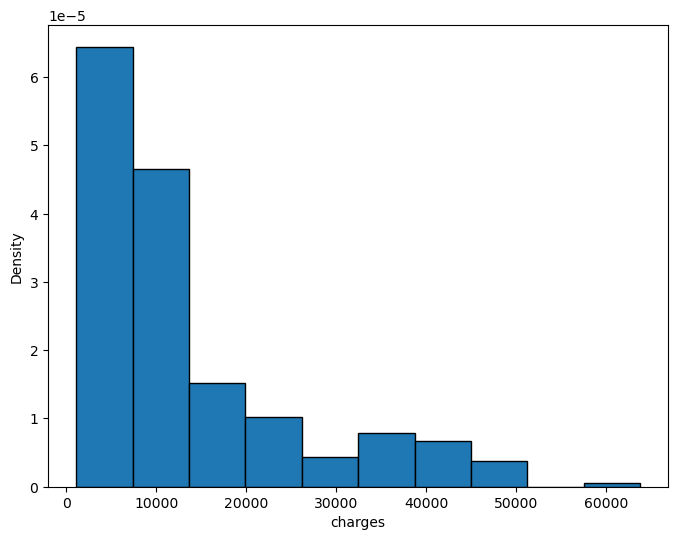

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0        bmi           0.654206
1    charges           9.719626


age,sex,bmi,children,smoker,region,charges
49,female,31.9,5,no,southwest,11552.904
32,female,17.765,2,yes,northwest,32734.1863
32,female,29.8,2,no,southwest,5152.134
34,male,34.21,0,no,southeast,3935.1799
61,female,28.2,0,no,southwest,13041.921
61,male,32.3,2,no,northwest,14119.62
26,male,29.45,0,no,northeast,2897.3235
26,male,23.7,2,no,southwest,3484.331
38,male,29.26,2,no,northwest,6457.8434
38,male,28.025,1,no,northeast,6067.12675


Remaining Rows in the data: 1069                                                        
Remaining Columns in the data: 7


Skipping customized anti-select columns.                                                


Analysis indicates all categorical columns are significant. No action Needed.            


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


children,region,smoker,id,bmi,sex,charges,age
4,southeast,no,230,29.04,female,7243.8136,age_2
4,northeast,no,511,33.63,male,17128.42608,age_1
4,southwest,no,695,29.6,male,7512.267,age_2
4,northeast,no,1123,28.215,male,10407.08585,age_2
4,northeast,no,872,31.35,female,4561.1885,age_1
4,southeast,no,1168,33.66,male,12949.1554,age_3
5,northeast,no,1006,28.5,male,6799.458,age_1
5,northeast,no,253,29.64,male,9222.4026,age_2
5,southwest,no,612,25.8,male,10096.97,age_2
5,southeast,no,449,33.44,male,6653.7886,age_1


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.                                                 


region,age,children,smoker,id,bmi,sex,charges
12775.700023636367,age_2,1,no,10,27.4,female,6496.886
12775.700023636367,age_2,1,no,954,34.8,female,5246.047
12775.700023636367,age_3,0,no,509,36.2,male,8457.818
12775.700023636367,age_2,1,no,946,30.5,male,4751.07
12775.700023636367,age_3,1,no,69,27.1,female,26140.3603
12775.700023636367,age_3,0,no,877,33.1,male,13393.756
12495.154729885056,age_2,1,no,605,36.67,male,28468.91901
12495.154729885056,age_2,1,no,623,21.85,male,6117.4945
12495.154729885056,age_3,1,no,193,24.7,male,30166.61817
12495.154729885056,age_1,1,no,339,24.605,female,2709.24395


['age', 'smoker', 'sex']


region,age_0,age_1,age_2,children,smoker_0,smoker_1,id,bmi,sex_0,sex_1,charges
12955.697910321136,1,0,0,1,0,1,856,27.36,0,1,17178.6824
12955.697910321136,1,0,0,1,1,0,396,28.975,0,1,4040.55825
12955.697910321136,0,1,0,1,1,0,52,27.265,1,0,6555.07035
12955.697910321136,0,0,1,1,1,0,260,35.245,0,1,11394.06555
12955.697910321136,1,0,0,1,1,0,998,26.885,0,1,4441.21315
12955.697910321136,0,0,1,1,1,0,541,27.075,1,0,10106.13425
12955.697910321136,1,0,0,1,0,1,1491,21.85,1,0,15359.1045
12955.697910321136,0,0,1,1,1,0,149,30.78,1,0,9778.3472
12955.697910321136,0,1,0,1,1,0,621,27.265,1,0,9447.25035
12955.697910321136,0,1,0,1,1,0,357,31.635,1,0,7358.17565


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


No information provided for customized outlier processing. AutoML will proceed with default settings.


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0        bmi           0.654818
1    charges           9.728718


['bmi']


region,age_0,age_1,age_2,children,smoker_0,smoker_1,id,bmi,sex_0,sex_1,charges
12775.700023636367,0,1,0,0,0,1,92,19.3,0,1,15820.699
12775.700023636367,0,1,0,1,1,0,1294,29.0,1,0,7050.642
12775.700023636367,1,0,0,0,1,0,1475,25.8,1,0,2007.945
12775.700023636367,0,1,0,0,1,0,597,29.6,0,1,21232.18226
12775.700023636367,0,0,1,1,1,0,798,39.6,0,1,10450.552
12775.700023636367,0,0,1,0,1,0,1114,36.7,0,1,9144.565
12775.700023636367,0,1,0,1,0,1,687,28.3,0,1,21082.16
12775.700023636367,0,1,0,1,1,0,108,31.0,0,1,5488.262
12775.700023636367,0,0,1,0,1,0,562,25.0,1,0,13451.122
12775.700023636367,0,1,0,1,0,1,741,28.0,0,1,23568.272


['children', 'age_0', 'age_2', 'smoker_1', 'smoker_0', 'region', 'bmi']


['children', 'region', 'bmi']


age_0,age_2,smoker_1,id,smoker_0,charges,children,region,bmi
0,0,0,10,1,6496.886,-0.07404155161763351,-0.5686174093420177,-0.5378217472704564
0,0,0,12,1,6457.8434,0.7624704464454171,-0.8783405480276613,-0.2239568058209512
0,1,0,13,1,11552.904,3.2720064406345686,-0.5686174093420177,0.2215289175267324
0,1,0,14,1,13041.921,-0.910553549680684,-0.5686174093420177,-0.40282607352873384
1,0,0,16,1,3484.331,0.7624704464454171,-0.5686174093420177,-1.1621767383259227
0,0,1,17,0,18972.495,0.7624704464454171,1.5870178922206502,-0.8921853908424775
1,0,1,15,0,32734.1863,0.7624704464454171,-0.8783405480276613,-2.163675892897326
1,0,1,11,0,13844.506,-0.910553549680684,-0.5686174093420177,-1.499665922680229
0,0,0,9,1,3935.1799,-0.910553549680684,1.5870178922206502,0.6113289254559564
1,0,0,8,1,2897.3235,-0.910553549680684,-0.3698990043470887,-0.1918953333072925


['sex_0', 'children', 'age_0', 'age_2', 'smoker_1', 'smoker_0', 'age_1', 'region', 'bmi']


['r_children', 'r_region', 'r_bmi']


r_age_0,r_smoker_1,r_sex_0,id,r_age_2,r_age_1,r_smoker_0,charges,r_children,r_region,r_bmi
0,0,1,10,0,1,1,6496.886,-0.07404155161763351,-0.5686174093420177,-0.5378217472704564
0,0,0,12,0,1,1,6457.8434,0.7624704464454171,-0.8783405480276613,-0.2239568058209512
0,0,1,13,1,0,1,11552.904,3.2720064406345686,-0.5686174093420177,0.2215289175267324
0,0,1,14,1,0,1,13041.921,-0.910553549680684,-0.5686174093420177,-0.40282607352873384
1,0,0,16,0,0,1,3484.331,0.7624704464454171,-0.5686174093420177,-1.1621767383259227
0,1,0,17,0,1,0,18972.495,0.7624704464454171,1.5870178922206502,-0.8921853908424775
1,1,1,15,0,0,0,32734.1863,0.7624704464454171,-0.8783405480276613,-2.163675892897326
1,1,1,11,0,0,0,13844.506,-0.910553549680684,-0.5686174093420177,-1.499665922680229
0,0,0,9,0,1,1,3935.1799,-0.910553549680684,1.5870178922206502,0.6113289254559564
1,0,0,8,0,0,1,2897.3235,-0.910553549680684,-0.3698990043470887,-0.1918953333072925


['region', 'children', 'bmi']


sex_0,age_0,age_2,smoker_1,id,smoker_0,age_1,charges,sex_1,region,children,bmi
1,0,0,0,52,1,1,6555.07035,0,-0.3698990175427499,-0.07404155161763323,-0.560602267214374
0,1,0,0,998,1,0,4441.21315,1,-0.3698990175427499,-0.07404155161763323,-0.624725212241692
1,0,1,0,541,1,0,10106.13425,0,-0.3698990175427499,-0.07404155161763323,-0.5926637397280332
1,1,0,1,918,0,0,58571.07448,0,-0.3698990175427499,-0.07404155161763323,1.266901666064191
0,0,0,0,20,1,1,6067.12675,1,-0.3698990175427499,-0.07404155161763323,-0.4323563771597382
1,0,1,0,340,1,0,11879.10405,0,-0.3698990175427499,-0.07404155161763323,0.30505749065442056
0,0,0,1,741,0,1,23568.272,1,-0.5686174078099003,-0.07404155161763323,-0.43657499196416677
1,0,1,0,562,1,0,13451.122,0,-0.5686174078099003,-0.9105535496806807,-0.9428087684956253
0,0,0,1,92,0,1,15820.699,1,-0.5686174078099003,-0.9105535496806807,-1.9046529439053965
0,0,0,0,108,1,1,5488.262,1,-0.5686174078099003,-0.07404155161763323,0.06965878456729178


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6']


                                                                                          
Completed customized hyperparameter update.


response_column : charges                                                                                                                             
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (4, 5, 6)
min_node_size : (1, 2, 3)
iter_num : (10, 20, 30)
seed : 42
Total number of models for xgboost : 1944
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,XGBOOST_1,lasso,2738.516900,2.211772e+07,0.202092,33.780201,-18.112550,4702.948146,0.449546,24073.576458,0.834806,0.836500,1906.167035,0.225732,0.833709
1,2,XGBOOST_5,pca,2910.049866,2.382198e+07,0.193389,33.244328,-17.786278,4880.776695,0.439760,22315.454992,0.822077,0.822077,1974.542738,0.216695,0.820896
2,3,XGBOOST_4,pca,2873.485501,2.414535e+07,0.177146,30.520904,-13.627100,4913.792283,0.420887,24289.172880,0.819662,0.821918,1926.644504,0.206122,0.818464
3,4,XGBOOST_3,rfe,4577.811894,4.826346e+07,0.213055,39.170780,-22.364039,6947.191103,0.461579,24489.853647,0.639528,0.640922,2678.831841,0.241263,0.636444
4,5,XGBOOST_0,lasso,4779.185609,5.102572e+07,0.244442,42.376184,-25.453433,7143.229133,0.494411,23590.063736,0.618897,0.624086,2859.229320,0.278871,0.616366
5,6,XGBOOST_2,rfe,5278.874244,5.954775e+07,0.312217,34.879385,22.060317,7716.718898,0.558764,26855.353839,0.555247,0.736471,4271.871136,0.466739,0.551442


In [17]:
# Fitting train data
aml.fit(insurance_df_train, insurance_df_train.charges)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,XGBOOST_1,lasso,2738.516900,2.211772e+07,0.202092,33.780201,-18.112550,4702.948146,0.449546,24073.576458,0.834806,0.836500,1906.167035,0.225732,0.833709
1,2,XGBOOST_5,pca,2910.049866,2.382198e+07,0.193389,33.244328,-17.786278,4880.776695,0.439760,22315.454992,0.822077,0.822077,1974.542738,0.216695,0.820896
2,3,XGBOOST_4,pca,2873.485501,2.414535e+07,0.177146,30.520904,-13.627100,4913.792283,0.420887,24289.172880,0.819662,0.821918,1926.644504,0.206122,0.818464
3,4,XGBOOST_3,rfe,4577.811894,4.826346e+07,0.213055,39.170780,-22.364039,6947.191103,0.461579,24489.853647,0.639528,0.640922,2678.831841,0.241263,0.636444
4,5,XGBOOST_0,lasso,4779.185609,5.102572e+07,0.244442,42.376184,-25.453433,7143.229133,0.494411,23590.063736,0.618897,0.624086,2859.229320,0.278871,0.616366
5,6,XGBOOST_2,rfe,5278.874244,5.954775e+07,0.312217,34.879385,22.060317,7716.718898,0.558764,26855.353839,0.555247,0.736471,4271.871136,0.466739,0.551442


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,XGBOOST_1,lasso,2738.5169,2.211772e+07,0.202092,33.780201,-18.11255,4702.948146,0.449546,24073.576458,0.834806,0.8365,1906.167035,0.225732,0.833709


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [20]:
aml.model_hyperparameters(rank=1)

{'response_column': 'charges',
 'name': 'xgboost',
 'model_type': 'Regression',
 'column_sampling': 1,
 'min_impurity': 0.0,
 'lambda1': 1,
 'shrinkage_factor': 0.3,
 'max_depth': 5,
 'min_node_size': 2,
 'iter_num': 10,
 'seed': 42,
 'persist': False,
 'max_models': 2}

In [21]:
aml.model_hyperparameters(rank=4)

{'response_column': 'charges',
 'name': 'xgboost',
 'model_type': 'Regression',
 'column_sampling': 0.6,
 'min_impurity': 0.1,
 'lambda1': 1,
 'shrinkage_factor': 0.3,
 'max_depth': 4,
 'min_node_size': 3,
 'iter_num': 10,
 'seed': 42,
 'persist': False,
 'max_models': 2}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [22]:
# Generating prediction on test data
prediction = aml.predict(insurance_df_test)

Data Transformation started ...


children,region,smoker,id,bmi,sex,charges,age
0,northwest,no,119,23.655,male,2352.96845,age_1
0,northeast,no,72,25.08,female,7325.0482,age_2
0,northwest,yes,96,26.885,female,21774.32215,age_2
0,northeast,no,104,26.03,male,6837.3687,age_2
0,southwest,no,152,35.1,female,12644.589,age_3
0,northeast,no,160,29.64,male,12730.9996,age_3
3,southwest,no,304,36.1,male,12363.547,age_3
3,northeast,no,9,19.0,female,6753.038,age_2
3,northeast,no,15,37.145,female,6334.34355,age_1
3,northwest,no,31,33.155,female,6128.79745,age_1


region,age,children,smoker,id,bmi,sex,charges
12955.697910321136,age_2,1,yes,70,28.025,male,20773.62775
12955.697910321136,age_2,1,no,148,33.725,female,8823.98575
12955.697910321136,age_2,1,no,157,35.91,female,26392.26029
12955.697910321136,age_2,1,yes,50,28.12,female,22331.5668
12955.697910321136,age_3,1,no,123,25.46,male,12913.9924
12955.697910321136,age_2,1,no,342,33.155,female,7639.41745
12775.700023636367,age_2,0,no,78,31.5,male,4402.233
12775.700023636367,age_1,3,no,199,32.7,male,3591.48
12775.700023636367,age_2,0,no,302,37.9,female,6474.013
12775.700023636367,age_1,0,no,99,19.8,male,1241.565


region,age_0,age_1,age_2,children,smoker_0,smoker_1,id,bmi,sex_0,sex_1,charges
12495.154729885056,1,0,0,1,1,0,235,24.13,0,1,4032.2407
12495.154729885056,0,0,1,1,1,0,162,27.55,0,1,13937.6665
12495.154729885056,0,1,0,1,0,1,25,27.835,0,1,20009.63365
12495.154729885056,1,0,0,1,1,0,298,31.255,1,0,3956.07145
12495.154729885056,1,0,0,2,1,0,68,32.11,1,0,4922.9159
12495.154729885056,0,1,0,2,1,0,61,30.59,0,1,7256.7231
12775.700023636367,0,0,1,0,1,0,189,30.8,0,1,13390.559
12775.700023636367,1,0,0,0,1,0,67,17.8,1,0,1727.785
12775.700023636367,1,0,0,4,1,0,89,29.4,0,1,6059.173
12775.700023636367,0,1,0,2,1,0,294,27.4,0,1,7726.854


id,children,age_0,age_2,smoker_1,smoker_0,region,bmi,charges
38,0,0,1,0,1,12775.7,44.0,13063.883
222,0,1,0,0,1,12775.7,29.1,3761.292
331,0,0,0,0,1,12775.7,33.1,7345.084
187,2,0,1,0,1,12775.7,35.9,11163.568
49,0,0,1,0,1,12775.7,39.7,14319.031
35,0,1,0,0,1,12775.7,28.9,1743.214
294,2,0,0,0,1,12775.7,27.4,7726.854
165,3,0,0,0,1,12775.7,34.3,9563.029
11,0,1,0,0,1,12775.7,35.4,1263.249
363,4,1,0,1,0,12775.7,25.7,17942.106


age_0,age_2,smoker_1,id,smoker_0,charges,children,region,bmi
0,1,0,38,1,13063.883,-0.910553549680684,-0.5686174093420177,2.2633384828702847
1,0,0,222,1,3761.292,-0.910553549680684,-0.5686174093420177,-0.2509559405692957
0,0,0,331,1,7345.084,-0.910553549680684,-0.5686174093420177,0.42402242813931657
0,1,0,187,1,11163.568,0.7624704464454171,-0.5686174093420177,0.8965072862353447
0,1,0,49,1,14319.031,-0.910553549680684,-0.5686174093420177,1.537736736508527
1,0,0,35,1,1743.214,-0.910553549680684,-0.5686174093420177,-0.2847048590047268
0,0,0,294,1,7726.854,0.7624704464454171,-0.5686174093420177,-0.5378217472704564
0,0,0,165,1,9563.029,1.5989824445084677,-0.5686174093420177,0.6265159387518996
1,0,0,11,1,1263.249,-0.910553549680684,-0.5686174093420177,0.8121349901467682
1,0,1,363,0,17942.106,2.435494442571518,-0.5686174093420177,-0.8246875539716165


id,sex_0,children,age_0,age_2,smoker_1,smoker_0,age_1,region,bmi,charges
38,1,0,0,1,0,1,0,12775.7,44.0,13063.883
222,1,0,1,0,0,1,0,12775.7,29.1,3761.292
331,1,0,0,0,0,1,1,12775.7,33.1,7345.084
187,1,2,0,1,0,1,0,12775.7,35.9,11163.568
49,1,0,0,1,0,1,0,12775.7,39.7,14319.031
35,1,0,1,0,0,1,0,12775.7,28.9,1743.214
294,0,2,0,0,0,1,1,12775.7,27.4,7726.854
165,0,3,0,0,0,1,1,12775.7,34.3,9563.029
11,0,0,1,0,0,1,0,12775.7,35.4,1263.249
363,0,4,1,0,1,0,0,12775.7,25.7,17942.106


r_age_0,r_smoker_1,r_sex_0,id,r_age_2,r_age_1,r_smoker_0,charges,r_children,r_region,r_bmi
1,0,0,11,0,0,1,1263.249,-0.910553549680684,-0.5686174093420177,0.8121349901467682
1,1,0,214,0,0,0,19199.944,1.5989824445084677,-0.5686174093420177,-0.790938635536186
1,1,0,19,0,0,0,16297.846,-0.910553549680684,-0.5686174093420177,-0.4871983696173104
1,0,0,126,0,0,1,3277.161,-0.07404155161763351,-0.5686174093420177,1.099000796847929
0,0,0,150,1,0,1,11365.952,-0.910553549680684,-0.5686174093420177,1.2508709298073664
1,0,0,199,0,0,1,3591.48,1.5989824445084677,-0.5686174093420177,0.3565245912684556
1,0,1,100,0,0,1,5708.867,2.435494442571518,-0.5686174093420177,-0.8415620131893315
0,1,1,194,0,1,0,46113.511,0.7624704464454171,-0.5686174093420177,2.870819014708036
0,0,1,38,1,0,1,13063.883,-0.910553549680684,-0.5686174093420177,2.2633384828702847
1,0,1,43,0,0,1,1728.897,-0.910553549680684,-0.5686174093420177,-2.022774158429403


sex_0,age_0,age_2,smoker_1,id,smoker_0,age_1,charges,sex_1,region,children,bmi
1,0,1,0,38,1,0,13063.883,0,-0.5686174339045442,-0.9105535496806807,2.263338482870279
1,1,0,0,222,1,0,3761.292,0,-0.5686174339045442,-0.9105535496806807,-0.2509559405692984
1,0,0,0,331,1,1,7345.084,0,-0.5686174339045442,-0.9105535496806807,0.424022428139313
1,0,1,0,187,1,0,11163.568,0,-0.5686174339045442,0.7624704464454142,0.8965072862353405
1,0,1,0,49,1,0,14319.031,0,-0.5686174339045442,-0.9105535496806807,1.5377367365085222
1,1,0,0,35,1,0,1743.214,0,-0.5686174339045442,-0.9105535496806807,-0.2847048590047294
0,0,0,0,294,1,1,7726.854,1,-0.5686174339045442,0.7624704464454142,-0.5378217472704587
0,0,0,0,165,1,1,9563.029,1,-0.5686174339045442,1.5989824445084617,0.6265159387518957
0,1,0,0,11,1,0,1263.249,1,-0.5686174339045442,-0.9105535496806807,0.812134990146764
0,1,0,1,363,0,0,17942.106,1,-0.5686174339045442,2.435494442571509,-0.8246875539716184


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,charges
0,100,-0.999226,2.225056,0.643837,0.761005,0.826904,-0.598747,0.376680,5708.867
1,294,-0.749257,0.919178,0.126780,-0.647838,-0.295801,-0.025249,-0.755538,7726.854
2,194,1.659766,1.236695,-2.123714,0.656618,0.487190,1.451298,-0.361805,46113.511
3,165,0.091337,1.853372,-0.534573,-0.578970,-0.128759,-0.081522,-0.701527,9563.029
4,38,1.151920,-0.597376,-2.222808,0.818516,-0.472462,-0.033322,0.258888,13063.883
5,11,0.162542,-0.794694,-1.087083,-0.698603,0.597942,-0.471272,-0.139988,1263.249
6,43,-1.904066,-1.145146,0.885106,0.601600,0.465870,-0.329291,0.019279,1728.897
7,363,-0.863292,2.287898,0.716080,-0.837500,1.073405,0.478193,0.820369,17942.106
8,222,-0.651436,-0.958301,-0.340308,0.660759,0.622418,-0.306679,-0.052772,3761.292
9,214,-0.856870,1.480047,0.548820,-0.866364,1.012220,0.549756,0.717638,19199.944


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being picked for evaluation:
Model ID : XGBOOST_1 
Feature Selection Method : lasso

Prediction : 
    id    Prediction  Confidence_Lower  Confidence_upper    charges
0   38  12403.583361      12403.583361      12403.583361  13063.883
1  222   3093.329397       3093.329397       3093.329397   3761.292
2  331   6980.130754       6980.130754       6980.130754   7345.084
3  187  19129.914818      19129.914818      19129.914818  11163.568
4   49  11860.180683      11860.180683      11860.180683  14319.031
5   35   3093.329397       3093.329397       3093.329397   1743.214
6  294   7783.872536       7783.872536       7783.872536   7726.854
7  165   7436.337930       7436.337930       7436.337930   9563.029
8   11   3110.732509       3110.732509       3110.732509   1263.249
9  363  17484.785015      17484.785015      17484.785015  17942.106


In [23]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,charges
10,9045.085250999999,9045.085250999999,9045.085250999999,6610.1097
12,6525.129201,6525.129201,6525.129201,6652.5288
13,25567.088710999997,25567.088710999997,25567.088710999997,23807.2406
14,44902.298511,44902.298511,44902.298511,46599.1084
16,6042.579876999999,6042.579876999999,6042.579876999999,3490.5491
17,7935.024958,7935.024958,7935.024958,4320.4109
15,5744.040707,5744.040707,5744.040707,6334.3435
11,3110.7325089999995,3110.7325089999995,3110.7325089999995,1263.249
9,6968.380683,6968.380683,6968.380683,6753.038
8,5404.132866,5404.132866,5404.132866,2904.088


In [25]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(insurance_df_test)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : XGBOOST_1 
Feature Selection Method : lasso

Performance Metrics : 
           MAE           MSE      MSLE       MAPE        MPE        RMSE     RMSLE            ME        R2        EV          MPD       MGD
0  2521.269434  1.809883e+07  0.195194  34.717945 -21.338999  4254.27215  0.441808  22857.496031  0.870003  0.870127  1597.297564  0.214234


In [26]:
performance_metrics

MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD
2521.269433738806,18098831.527021717,0.1951940020800692,34.71794474934881,-21.33899946349383,4254.272150088863,0.4418076528084017,22857.496031000002,0.8700025052417479,0.8701267600152334,1597.2975644434266,0.2142339972580636


In [27]:
remove_context()

True